In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
raw_data = pd.read_csv('Scaled_Absenteeism_preprocessed.csv')
Scaled_inputs = raw_data.copy()
targets = pd.read_csv('Targets_Absenteeism_preprocessed.csv')

In [ ]:
Scaled_inputs.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,False,False,False,True,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487
1,False,False,False,False,0.182726,-1.574681,2.130803,1.002633,0,-0.019280,-0.589690
2,False,False,False,True,0.182726,-0.654143,0.248310,1.002633,0,-0.919030,-0.589690
3,True,False,False,False,0.182726,0.854936,0.405184,-0.643782,0,0.880469,-0.589690
4,False,False,False,True,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487


In [ ]:
targets.head()

,0
0,1
1,0
2,0
3,1
4,0


In [ ]:
X = Scaled_inputs
y = targets

## Random Forest Model

In [ ]:
#splitting the data set into training and testing
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 78.57%


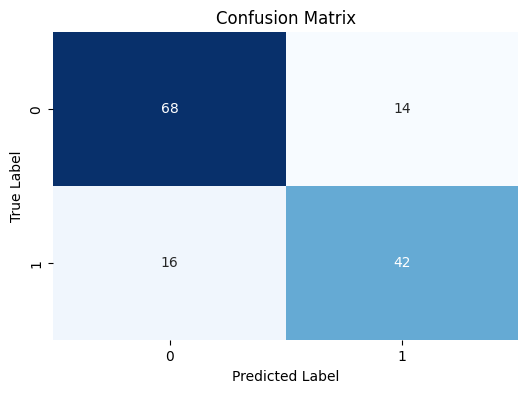

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
importances = classifier.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importance_df)

                   Feature  Importance
4              Month Value    0.361396
5   Transportation Expense    0.129224
6                      Age    0.092246
0                 Reason_1    0.088652
3                 Reason_4    0.087698
7          Body Mass Index    0.083940
9                 Children    0.060093
2                 Reason_3    0.050675
10                    Pets    0.027327
8                Education    0.015600
1                 Reason_2    0.003150
